In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
import scipy
import librain as lb

import warnings
warnings.filterwarnings('ignore')

## Constants

In [2]:
ws = '3800' # window size of data analsyis

IMAGING_FRAMERATE = 1/(34704.0/1e6)

## File paths

In [3]:
blacklist = (
    '20180312/Experiment_11',
    '20180312/Experiment_12',
    '20180312/Experiment_13',
    '20180315',
    '20180419/Experiment_1',
    '20180419/Experiment_2',
    '20180420',
    '20180424'
)

In [4]:
path = "\\Users\\User\\Documents\\FEDCODE - Nick\\"

direc = lb.Data(path)

date = "20180312"

# help(direc.experiment)

# help(direc.file)

file_dict = {}

for i in range(1, 11):
    EXP = direc.experiment(date, i)
    file_dict[f"file_{i}_12"] = direc.file(
        EXP, "freq split ws={}".format(ws)
    )
EXP_1_16 = direc.experiment("march 16 2018", 1)

EXP_2_16 = direc.experiment("march 16 2018", 2)

file_1_16 = direc.file(
    EXP_1_16, "freq split ws={}".format(ws)
)

file_2_16 = direc.file(
    EXP_2_16, "freq split ws={}".format(ws)
)

In [5]:
together_files = []

together_files_range = [2, 4, 6, 8, 10]

for i in together_files_range:
    together_files.append(file_dict.get("file_{}_12".format(i)))
    
together_files.append(file_1_16)

In [6]:
full_separation_files = []

full_separation_files_range = [1, 3, 5, 7, 9]

for i in full_separation_files_range:
    full_separation_files.append(file_dict.get("file_{}_12".format(i)))
    
full_separation_files.append(file_2_16)

In [7]:
together_files_1 = [
    "D:/2_mice/20180312/Experiment_2/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_10/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_8/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_4/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_6/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180316/Experiment_1/frequency_split_correlation_filtered_ws=3800.py.npy",
]

full_separation_files_1 = [
    "D:/2_mice/20180312/Experiment_7/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_9/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_5/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_3/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180312/Experiment_1/frequency_split_correlation_filtered_ws=3800.py.npy",
    "D:/2_mice/20180316/Experiment_2/frequency_split_correlation_filtered_ws=3800.py.npy",
]

### Average the Separate Experiments

In [8]:
separate_exps_matrices = []
for file in full_separation_files:
    separate_exps_matrices.append(numpy.load(file))
    
min_shape = 10_000_000
for matrix in separate_exps_matrices:
    if matrix.shape[1] < min_shape:
        min_shape = matrix.shape[1]
arr_separate_exps = numpy.zeros(
    (
        len(separate_exps_matrices),
        separate_exps_matrices[0].shape[0],
        min_shape,
    )
)

arr_separate_points = numpy.zeros(
    (len(separate_exps_matrices))
)
for i in range(len(separate_exps_matrices)):
    arr_separate_exps[i] = separate_exps_matrices[i][
        :, :min_shape
    ]
    midpoint = (
        separate_exps_matrices[0].shape[1] // 2
        - int(ws) // 2
    )
    arr_separate_points[i] = numpy.mean(
        separate_exps_matrices[i][
            0, midpoint - 10 : midpoint + 10
        ]
    )

### Average the together experiments

In [9]:
together_exps_matrices = []
for file in together_files:
    together_exps_matrices.append(numpy.load(file))
    
min_shape = 10_000_000
for matrix in together_exps_matrices:
    if matrix.shape[1] < min_shape:
        min_shape = matrix.shape[1]
arr_together_exps = numpy.zeros(
    (
        len(together_exps_matrices),
        together_exps_matrices[0].shape[0],
        min_shape,
    )
)

arr_together_points = numpy.zeros(
    (len(together_exps_matrices))
)
for i in range(len(together_exps_matrices)):
    arr_together_exps[i] = together_exps_matrices[i][
        :, :min_shape
    ]
    midpoint = (
        separate_exps_matrices[0].shape[1] // 2
        - int(ws) // 2
    )
    arr_together_points[i] = numpy.mean(
        together_exps_matrices[i][
            0, midpoint - 10 : midpoint + 10
        ]
    )


### Average the two types of experiments

In [10]:
mean_separate_exp = numpy.mean(arr_separate_exps, axis=0)
mean_together_exp = numpy.mean(arr_together_exps, axis=0)

max_x_value = mean_separate_exp.shape[1]/IMAGING_FRAMERATE

### Generate Labels

In [11]:
frequency_bands = [
    str(i)
    for i in (
        0.01,
        0.1,
        0.5,
        1.0,
        2.0,
        3.0,
        4.0,
        6.0,
        8.0,
        10.0,
        12.0,
    )
]

frequency_labels = []

for low, high in zip(frequency_bands, frequency_bands[1:]):
    frequency_labels.append(low+"-"+high)
y_ticks = (
    numpy.arange(numpy.shape(frequency_bands)[0]) - 0.5
)
y_ticks = numpy.flipud(y_ticks)

### Plot the correlation at different frequency bands

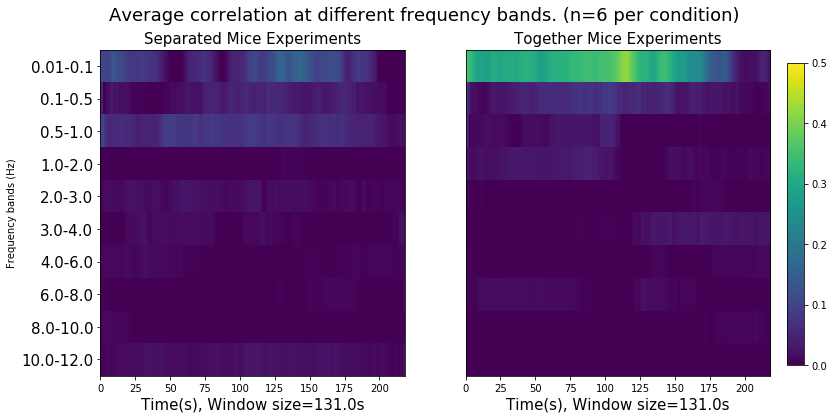

In [12]:
fig = plt.figure(figsize=(12, 6))
plt.suptitle(
    "Average correlation at different frequency bands. (n=%s per condition)"
    % str(arr_separate_exps.shape[0]),
    size=18,
)
plt.subplot(121)
plt.title("Separated Mice Experiments", size=15)
plt.yticks(y_ticks, frequency_labels, size=15)
plt.ylabel('Frequency bands (Hz)')
plt.imshow(
    mean_separate_exp,
    cmap="viridis",
    extent=[0, max_x_value, 0, 10],
    aspect="auto",
    vmin=0,
    vmax=0.5,
)
plt.xlabel(
    "Time(s), Window size=%ss"
    % (int(ws) // IMAGING_FRAMERATE),
    size=15,
)

plt.subplot(122)
plt.title("Together Mice Experiments", size=15)
plt.yticks([])
ax = plt.imshow(
    mean_together_exp,
    cmap="viridis",
    extent=[0, max_x_value, 0, 10],
    aspect="auto",
    vmin=0,
    vmax=0.5,
)
plt.xlabel(
    "Time(s), Window size=%ss"
    % (int(ws) // IMAGING_FRAMERATE),
    size=15,
)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ax, cax=cbar_ax)

### Generate Boxplot 

In [13]:
z_score, p_value = scipy.stats.ttest_ind(arr_separate_points, arr_together_points)
p_value

0.02776974635044804

In [14]:
data_frame = dict(
    Separated = arr_separate_points,
    Together = arr_together_points
)
df = pandas.DataFrame(data_frame)

Text(0.5,0.664351,'* $p=0.028$')

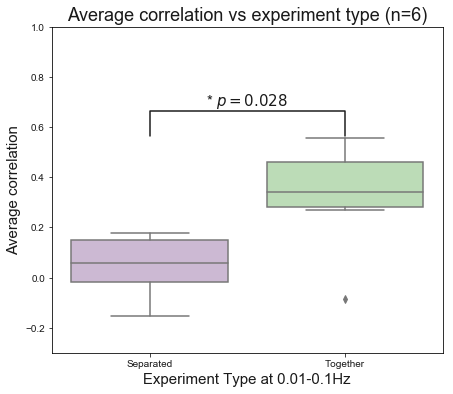

In [15]:
plt.figure(figsize=(7, 6))
plt.title(
    "Average correlation vs experiment type (n={})"
    .format(arr_separate_exps.shape[0]),
    size=18,
)
plt.ylabel("Average correlation", size=15)
plt.xlabel("Experiment Type at 0.01-0.1Hz", size=15)
seaborn.set(style="ticks")
seaborn.boxplot(data=df, palette="PRGn")

x1, x2 = (
    0,
    1,
)  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df.max().max() + 0.01, 0.1, "k"

plt.plot(
    [x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col
)
plt.ylim([-0.3, 1])
plt.text(
    (x1 + x2) * 0.5,
    y + h,
    r"* $p=%s$" % str(round(p_value, 3)) % p_value,
    ha="center",
    va="bottom",
    color=col,
    size=15,
)